# Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

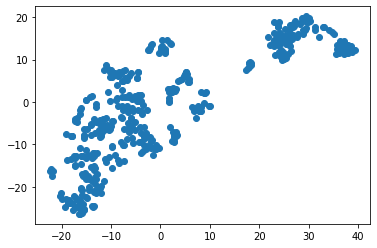

In [30]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

boston = load_boston()
boston.keys()
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']
X = pd.DataFrame(data, columns=feature_names)
#print(f'Датафрейм X(признаки):\n{X}')
y = pd.DataFrame(target, columns=['price'])
#print(f'Датафрейм y(стоимость):\n{y}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc = pd.DataFrame(X_train_sc, columns=feature_names)
X_test_sc = pd.DataFrame(X_test_sc, columns=feature_names)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_t = tsne.fit_transform(X_train_sc)
X_train_t.shape
plt.scatter(X_train_t[:,0], X_train_t[:,1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

Средняя цена недвижимости во всей выборке:
price    22.796535
dtype: float64
Средняя цена недвижимости в кластере 0:
price    24.958115
dtype: float64
Средняя цена недвижимости в кластере 1:
price    16.165354
dtype: float64
Средняя цена недвижимости в кластере 2:
price    27.788372
dtype: float64
Среднее значение CRIM в кластере 0:
0.42166020942408367
Среднее значение CRIM в кластере 1:
10.797028425196853
Среднее значение CRIM в кластере 2:
0.07356558139534886


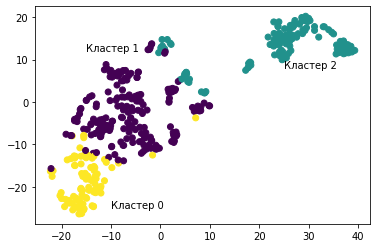

In [52]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_sc)
labels_test = kmeans.predict(X_test_sc)
plt.scatter(X_train_t[:,0], X_train_t[:,1], c=labels_train)
plt.text(-10, -25, 'Кластер 0')
plt.text(-15, 12, 'Кластер 1')
plt.text(25, 8, 'Кластер 2')

#Средние значения цен:
price_s = y_train.mean()
print(f'Средняя цена недвижимости во всей выборке:\n{price_s}')
price_s_cl0 = y_train[labels_train==0].mean()
print(f'Средняя цена недвижимости в кластере 0:\n{price_s_cl0}')
price_s_cl1 = y_train[labels_train==1].mean()
print(f'Средняя цена недвижимости в кластере 1:\n{price_s_cl1}')
price_s_cl2 = y_train[labels_train==2].mean()
print(f'Средняя цена недвижимости в кластере 2:\n{price_s_cl2}')

#Средние значения CRIM:
crim_cl0 = X_train.loc[labels_train==0, 'CRIM'].mean()
print(f'Среднее значение CRIM в кластере 0:\n{crim_cl0}')
crim_cl1 = X_train.loc[labels_train==1, 'CRIM'].mean()
print(f'Среднее значение CRIM в кластере 1:\n{crim_cl1}')
crim_cl2 = X_train.loc[labels_train==2, 'CRIM'].mean()
print(f'Среднее значение CRIM в кластере 2:\n{crim_cl2}')

### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [59]:
#Средние значения цен:
price_test_s = y_test.mean()
print(f'Средняя цена недвижимости во всей тестовой выборке:\n{price_test_s}')
price_test_cl0 = y_test[labels_test==0].mean()
print(f'Средняя цена недвижимости в кластере 0:\n{price_test_cl0}')
price_test_cl1 = y_test[labels_test==1].mean()
print(f'Средняя цена недвижимости в кластере 1:\n{price_test_cl1}')
price_test_cl2 = y_test[labels_test==2].mean()
print(f'Средняя цена недвижимости в кластере 2:\n{price_test_cl2}')
#Средние значения CRIM:
crim_test_cl0 = X_test.loc[labels_test==0, 'CRIM'].mean()
print(f'Среднее значение CRIM в кластере 0 (тестовая выборка):\n{crim_test_cl0}')
crim_test_cl1 = X_test.loc[labels_test==1, 'CRIM'].mean()
print(f'Среднее значение CRIM в кластере 1 (тестовая выборка):\n{crim_test_cl1}')
crim_test_cl2 = X_test.loc[labels_test==2, 'CRIM'].mean()
print(f'Среднее значение CRIM в кластере 2 (тестовая выборка):\n{crim_test_cl2}')

Средняя цена недвижимости во всей тестовой выборке:
price    21.488235
dtype: float64
Средняя цена недвижимости в кластере 0:
price    21.860784
dtype: float64
Средняя цена недвижимости в кластере 1:
price    16.437143
dtype: float64
Средняя цена недвижимости в кластере 2:
price    31.35
dtype: float64
Среднее значение CRIM в кластере 0 (тестовая выборка):
0.26607882352941176
Среднее значение CRIM в кластере 1 (тестовая выборка):
10.165531142857143
Среднее значение CRIM в кластере 2 (тестовая выборка):
0.062060000000000004
